In [16]:
import os, shutil
# disesuaikan path folder dataset
base_dir = 'C:/Users/Puspa Rahmawati/Documents/uangaslipalsu/dataset'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [2]:
# Convert image into Tensor format (in this case we are using Image_DataGenerator)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size=5,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300,300),
    batch_size=5,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300,300),
    batch_size=5,
    class_mode='categorical')

Found 640 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


C:\Users\Puspa Rahmawati\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
C:\Users\PUSPAR~1\AppData\Local\Temp/ipykernel_14188/1170743942.py:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/80
10/10 [==============================] - ETA: 0s - loss: 1.3874 - acc: 0.3400
Epoch 00001: saving model to training_1\cp.ckpt
10/10 [==============================] - 15s 1s/step - loss: 1.3874 - acc: 0.3400 - val_loss: 1.3216 - val_acc: 0.4333
Epoch 2/80
10/10 [==============================] - ETA: 0s - loss: 1.3377 - acc: 0.5200
Epoch 00002: saving model to training_1\cp.ckpt
10/10 [==============================] - 13s 1s/step - loss: 1.3377 - acc: 0.5200 - val_loss: 1.3100 - val_acc: 0.4667
Epoch 3/80
10/10 [==============================] - ETA: 0s - loss: 1.2227 - acc: 0.5800
Epoch 00003: saving model to training_1\cp.ckpt
10/10 [==============================] - 13s 1s/step - loss: 1.2227 - acc: 0.5800 - val_loss: 1.1231 - val_acc: 0.5333
Epoch 4/80
10/10 [==============================] - ETA: 0s - loss: 0.9590 - acc: 0.7400
Epoch 00004: saving model to training_1\cp.ckpt
10/10 [==============================] - 13s 1s/step - loss: 0.9590 - acc: 0.7400 - val_loss: 0

Epoch 33/80
10/10 [==============================] - ETA: 0s - loss: 0.0046 - acc: 1.0000
Epoch 00033: saving model to training_1\cp.ckpt
10/10 [==============================] - 15s 2s/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 34/80
10/10 [==============================] - ETA: 0s - loss: 0.0558 - acc: 0.9800
Epoch 00034: saving model to training_1\cp.ckpt
10/10 [==============================] - 15s 2s/step - loss: 0.0558 - acc: 0.9800 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 35/80
10/10 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.0000
Epoch 00035: saving model to training_1\cp.ckpt
10/10 [==============================] - 16s 2s/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 36/80
10/10 [==============================] - ETA: 0s - loss: 0.0045 - acc: 1.0000
Epoch 00036: saving model to training_1\cp.ckpt
10/10 [==============================] - 16s 2s/step - loss: 0.0045 - acc: 1.0000 - val_los

Epoch 65/80
10/10 [==============================] - ETA: 0s - loss: 0.0029 - acc: 1.0000
Epoch 00065: saving model to training_1\cp.ckpt
10/10 [==============================] - 15s 2s/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 66/80
10/10 [==============================] - ETA: 0s - loss: 0.0048 - acc: 1.0000
Epoch 00066: saving model to training_1\cp.ckpt
10/10 [==============================] - 15s 2s/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 67/80
10/10 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 00067: saving model to training_1\cp.ckpt
10/10 [==============================] - 14s 1s/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 68/80
10/10 [==============================] - ETA: 0s - loss: 0.0028 - acc: 1.0000
Epoch 00068: saving model to training_1\cp.ckpt
10/10 [==============================] - 13s 1s/step - loss: 0.0028 - acc: 1.0000 - val_los

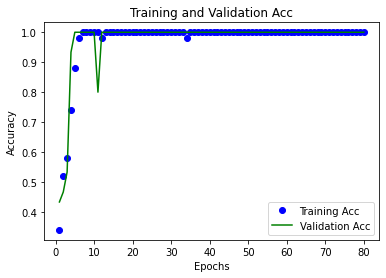

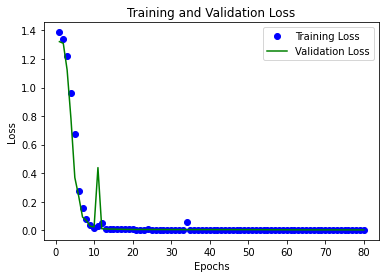

In [18]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), #lr learning rate
             loss='categorical_crossentropy',
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=10, 
    epochs=80,
    validation_data=validation_generator,
    validation_steps=6,callbacks=[cp_callback])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='Training Acc')
plt.plot(epochs, val_acc,'g',label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training Loss')
plt.plot(epochs, val_loss,'g',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model_80/my_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model_80/my_model\assets


In [20]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model_80/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [4]:
class_dictionary = train_generator.class_indices
class_dictionary

NameError: name 'train_generator' is not defined

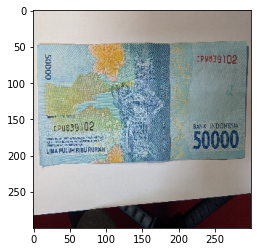

Gambar ini dikategorikan ke dalam kelas = 50_asli


In [29]:
# dipake buat menge-test per image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# disesuaikan path folder dataset
img_path="C:/Users/Puspa Rahmawati/Documents/uangaslipalsu/dataset/test/50_asli/A122.jpg"

img = image.load_img(img_path, target_size=(300,300))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img)
plt.show()
classes = new_model.predict(img_tensor, batch_size=10)
#print("Predicted class is:",classes)

output=''

a = classes[0]
nilai_max = a.max()
index_max = np.unravel_index(a.argmax(), a.shape)
index_max=int(index_max[0])

if index_max==0:
    output='100_asli'
elif index_max==1:
    output='100_mainan'
elif index_max==2:
    output='50_asli'
elif index_max==3:
    output='50_mainan'

print('Gambar ini dikategorikan ke dalam kelas =',output)
#print('Dengan tingkat keyakinan (confident)=',nilai_max)



In [9]:
# dipake untuk melakukan testing per-folder

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# disesuaikan path file mu
folder_path = "C:/Users/Puspa Rahmawati/Documents/uangaslipalsu/dataset/test/100_mainan"

# dimensions of images
img_width, img_height = 300, 300

new_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = new_model.predict(images, batch_size=10)
#print(classes)


print('Dengan jumlah citra sebanyak :',(len(classes)))
for idx, val in enumerate(classes):
    #print(idx, val)
    
    a = val
    nilai_max = a.max()
    index_max = np.unravel_index(a.argmax(), a.shape)
    index_max=int(index_max[0])

    if index_max==0:
        output='100_asli'
    elif index_max==1:
        output='100_mainan'
    elif index_max==2:
        output='50_asli'
    elif index_max==3:
        output='50_mainan'

    print(output, 'memiliki tingkat keyakinan (confident)=',nilai_max)


Dengan jumlah citra sebanyak : 11
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
100_mainan memiliki tingkat keyakinan (confident)= 1.0
